In [2]:
from fastai.vision.all import *
import warnings
warnings.filterwarnings("ignore", category=UserWarning, module="fastai.torch_core")


path = Path("C:\\Users\\emil\\Desktop\\flowers")


dls = ImageDataLoaders.from_folder(path, train=".", valid_pct=0.2, 
    item_tfms=Resize(460), batch_tfms=[*aug_transforms(size=224), Normalize.from_stats(*imagenet_stats)])

In [3]:
learn = cnn_learner(dls, resnet34, metrics=accuracy)
learn.fine_tune(4)


C:\Users\emil\anaconda3\Lib\site-packages\fastai\vision\learner.py:301: UserWarning: `cnn_learner` has been renamed to `vision_learner` -- please update your code
  warn("`cnn_learner` has been renamed to `vision_learner` -- please update your code")


epoch,train_loss,valid_loss,accuracy,time
0,1.029015,0.376558,0.864583,05:36


epoch,train_loss,valid_loss,accuracy,time
0,0.449512,0.228082,0.925926,06:33
1,0.326319,0.232112,0.918981,07:33
2,0.204195,0.188107,0.937500,08:07
3,0.130844,0.193490,0.935185,07:53


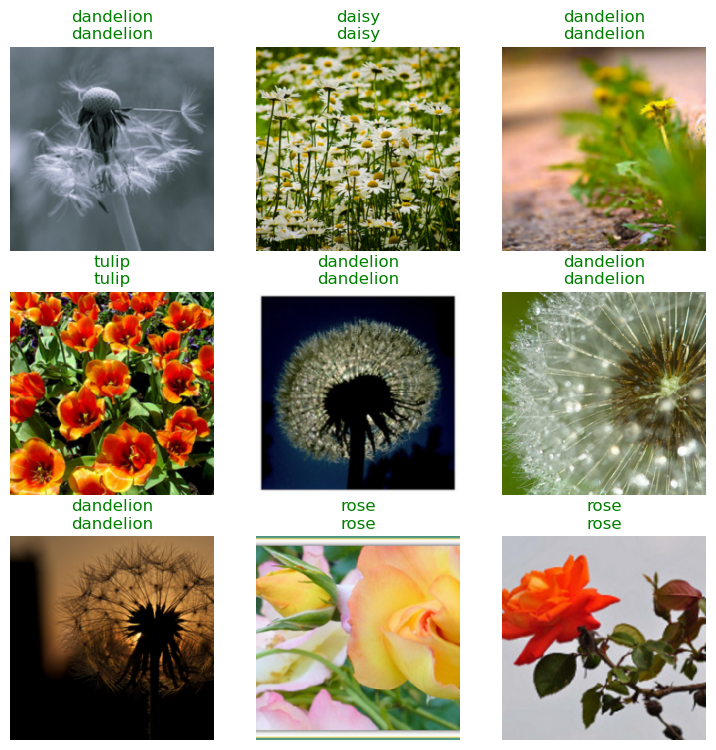

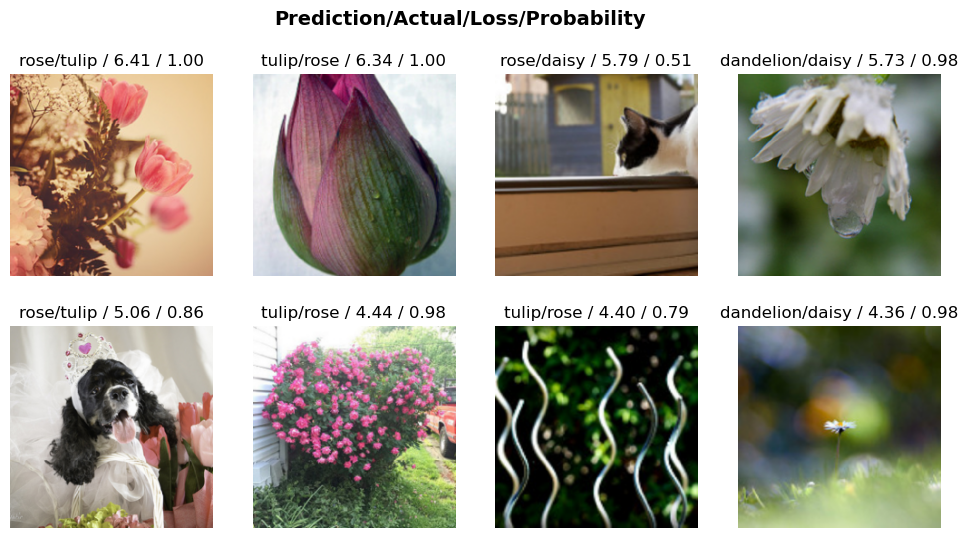

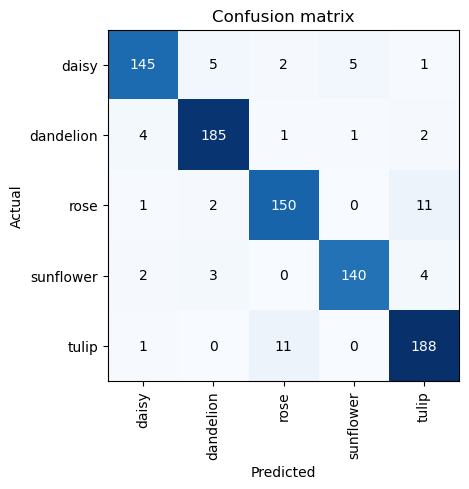

In [13]:

learn.show_results()


interp = ClassificationInterpretation.from_learner(learn)
interp.plot_top_losses(8, nrows=2)


interp.plot_confusion_matrix()


In [12]:
from random import randint

random_training_image = dls.train_ds[randint(0, len(dls.train_ds))][0]
prediction = learn.predict(random_training_image)
print("Predicted class:", prediction[0])


Predicted class: tulip
